The purpose of this notebook is to model with scaled data for better interpertation of coefficient values.


In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import standardscaler
from sklearn.preprocessing import StandardScaler

# modeling function import
from model import modeling_reg2

# import metrics
from sklearn.metrics import mean_squared_error

# imports for classifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
# read in batter training data
batter_train = pd.read_csv('../Modeling_Data/batter_data_modeling.csv')
# read in batter testing data
batter_test = pd.read_csv('../Modeling_Data/batter_test_data_c.csv')

In [3]:
# split data in TTS
X_train = batter_train.drop(columns=['Name', 'Team', 'POS', 'PTS', 'FPPG'])
y_train = batter_train['FPPG']
# testing 
X_test = batter_test.drop(columns=['Name', 'Team', 'Pos', 'PTS', 'FPPG'])
y_test = batter_test['FPPG']

In [4]:
# scale data
sc = StandardScaler()
# fit and transform X
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [5]:
# instaniate all models
linreg = LinearRegression()
knn = KNeighborsRegressor()
svc = SVR()
forest = RandomForestRegressor()
tree = DecisionTreeRegressor()
abc = AdaBoostRegressor()
bag = BaggingRegressor()

In [6]:
# create list of classifiers
class_list = [linreg, knn, svc, forest, tree, abc, bag]

In [7]:
results1 = modeling_reg2(batter_train, X_train_sc, y_train, batter_test, X_test_sc, y_test, class_list)

In [8]:
results1

,Baseline - RMSE,Model - RMSE,R2 Score - Train,R2 Score - Test
LinearRegression(),3.078159,4.443236,0.930907,-17.067229
KNeighborsRegressor(),3.078159,3.927950,0.926268,-13.119676
SVR(),3.078159,4.177346,0.951551,-14.969587
RandomForestRegressor(),3.078159,4.004018,0.988467,-13.671848
DecisionTreeRegressor(),3.078159,4.260782,1.000000,-15.613892
AdaBoostRegressor(),3.078159,3.924361,0.917579,-13.093885
BaggingRegressor(),3.078159,3.989318,0.984645,-13.564315


The RMSE above shows a very large improvement from the baseline model.

In [9]:
# generate predictions on testing data with grid
batter_test['Projected_FPPG'] = linreg.predict(X_test_sc)

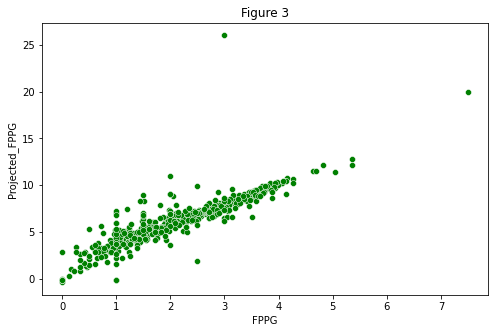

In [10]:
#### graph for visual
plt.figure(figsize=(8,5))
sns.scatterplot(data=batter_test, x='FPPG', y='Projected_FPPG', color='Green')
plt.title('Figure 3')
plt.savefig('../Images/batter_preds');

In [11]:
# dataframe of coefs
coef_df = pd.DataFrame(zip(X_train.columns, linreg.coef_), columns=['Feature', 'Coeficient'])
coef_df.sort_values(by='Coeficient', inplace=True)

In [12]:
coef_df

,Feature,Coeficient
0,GMS,-3.086197
3,H,-0.888016
12,TB,-0.617851
6,HR,-0.277104
4,2B,-0.186493
5,3B,-0.075215
8,BB,-0.055341
13,AVG,-0.045605
11,CS,-0.028871
10,SB,0.277466


In [13]:
# save projections to file 
batter_test.to_csv('../Projections/batter_projections_2021.csv', index=False)

In [14]:
results1.to_csv('../Projections/results_batter.csv')

---

# Pitcher Data

In [15]:
# read in pitcher training data
pitcher_train = pd.read_csv('../Modeling_Data/pitcher_data_modeling.csv')
# read in batter testing data
pitcher_test = pd.read_csv('../Modeling_Data/pitcher_test_data_c.csv')

In [16]:
# split data in TTS
X_train = pitcher_train.drop(columns=['Name', 'Team', 'POS', 'PTS', 'AVG', 'FPPG'])
y_train = pitcher_train['FPPG']
# testing 
X_test = pitcher_test.drop(columns=['Name', 'Team', 'Pos', 'PTS', 'AVG', 'FPPG'])
y_test = pitcher_test['FPPG']

In [17]:
# scale data
sc = StandardScaler()
# fit and transform X
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [18]:
results = modeling_reg2(pitcher_train, X_train_sc, y_train, pitcher_test, X_test_sc, y_test, class_list)

In [19]:
results

,Baseline - RMSE,Model - RMSE,R2 Score - Train,R2 Score - Test
LinearRegression(),9.344332,32.391922,0.887721,-327.460230
KNeighborsRegressor(),9.344332,9.352565,0.939830,-26.382356
SVR(),9.344332,7.807376,0.867597,-18.081809
RandomForestRegressor(),9.344332,11.473279,0.991398,-40.208275
DecisionTreeRegressor(),9.344332,22.594975,1.000000,-158.820718
AdaBoostRegressor(),9.344332,10.643548,0.913653,-34.463546
BaggingRegressor(),9.344332,11.523216,0.987806,-40.567772


The RMSE above shows a very large improvement from the baseline model.

In [20]:
# generate predictions on testing data with grid
pitcher_test['Projected_FPPG'] = linreg.predict(X_test_sc)

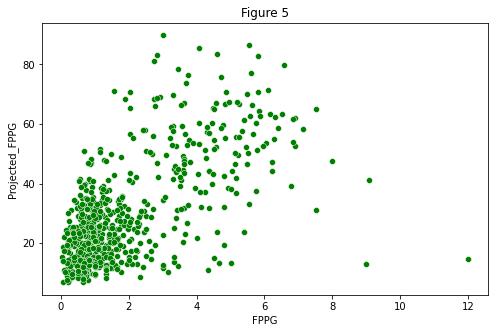

In [21]:
#### graph for visual
plt.figure(figsize=(8,5))
sns.scatterplot(data=pitcher_test, x='FPPG', y='Projected_FPPG', color='Green')
plt.title('Figure 5')
plt.savefig('../Images/pitcher_preds');

In [22]:
# dataframe of coefs
coef_df = pd.DataFrame(zip(X_train.columns, linreg.coef_), columns=['Feature', 'Coeficient'])
coef_df.sort_values(by='Coeficient', inplace=True)

In [23]:
coef_df

,Feature,Coeficient
13,WHIP,-31.130656
2,GMS,-4.012871
12,ERA,-1.133364
6,H,-0.723690
7,R,-0.619644
9,HR,-0.214696
4,SV,-0.019858
1,L,0.170519
8,ER,0.196460
0,W,0.980298


In [24]:
# save projections to file 
pitcher_test.to_csv('../Projections/pitcher_projections_2021.csv', index=False)

In [25]:
# results to file
results.to_csv('../Projections/results_pitcher.csv')

In [26]:
# write results to excel sheet 
with pd.ExcelWriter('../Projections/results.xlsx') as writer:
    results1.to_excel(writer, sheet_name='Batter')
    results.to_excel(writer, sheet_name='Pitcher')

---